<a href="https://colab.research.google.com/github/Nyck-Phoenyx/applied-mathematics/blob/main/radicao_vs_rajadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Abre o seletor de arquivos no Colab
from google.colab import files
uploaded = files.upload()

# Carrega o CSV (troque pelo nome do seu arquivo após o upload)
df = pd.read_csv("dados_metereologicos_stm-csv.csv", sep=";", engine="python")


# Dá uma olhada nas primeiras linhas
df.head()

Saving dados_metereologicos_stm-csv.csv to dados_metereologicos_stm-csv.csv


/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,01/05/2025,0,"25,8","26,0","25,8",NaN,NaN,NaN,NaN,NaN,NaN,"993,5","993,5","992,8","0,2","54,0","1,0",NaN,NaN
1,01/05/2025,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/05/2025,200,"24,9","25,1","24,9",NaN,NaN,NaN,NaN,NaN,NaN,"994,5","994,6","994,1","0,4","76,0","1,7",NaN,NaN
3,01/05/2025,300,"24,7","24,9","24,7",NaN,NaN,NaN,NaN,NaN,NaN,"994,2","994,5","994,2","0,4","48,0","0,9",NaN,NaN
4,01/05/2025,400,"24,6","24,7","24,6",NaN,NaN,NaN,NaN,NaN,NaN,"993,8","994,3","993,8","0,3","206,0","0,8",NaN,NaN


In [20]:
# Converter colunas para string primeiro, substituir vírgula por ponto, depois converter para float
columns_to_convert_in_selection = ["Raj. Vento (m/s)", "Radiacao (KJ/m²)"]
for col in columns_to_convert_in_selection:
  # Converter para string primeiro para garantir que o acessador .str funcione, depois substituir vírgula e converter para float
  selected_columns_df[col] = selected_columns_df[col].astype(str).str.replace(",", ".", regex=False)
  # Usar errors='coerce' para transformar análises inválidas em NaN
  selected_columns_df[col] = pd.to_numeric(selected_columns_df[col], errors='coerce')

# Exibir as primeiras linhas para verificar a conversão
display(selected_columns_df.head())
# Exibir os tipos de dados para confirmar
print(selected_columns_df.info())

/tmp/ipython-input-967101295.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df[col] = selected_columns_df[col].astype(str).str.replace(",", ".", regex=False)
/tmp/ipython-input-967101295.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df[col] = pd.to_numeric(selected_columns_df[col], errors='coerce')
/tmp/ipython-input-967101295.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,Raj. Vento (m/s),Radiacao (KJ/m²)
10,2.3,8.6
11,3.0,87.6
12,3.8,731.0
13,2.9,1811.9
14,4.6,2389.2


<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 10 to 2226
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Raj. Vento (m/s)  837 non-null    float64
 1   Radiacao (KJ/m²)  837 non-null    float64
dtypes: float64(2)
memory usage: 19.6 KB
None


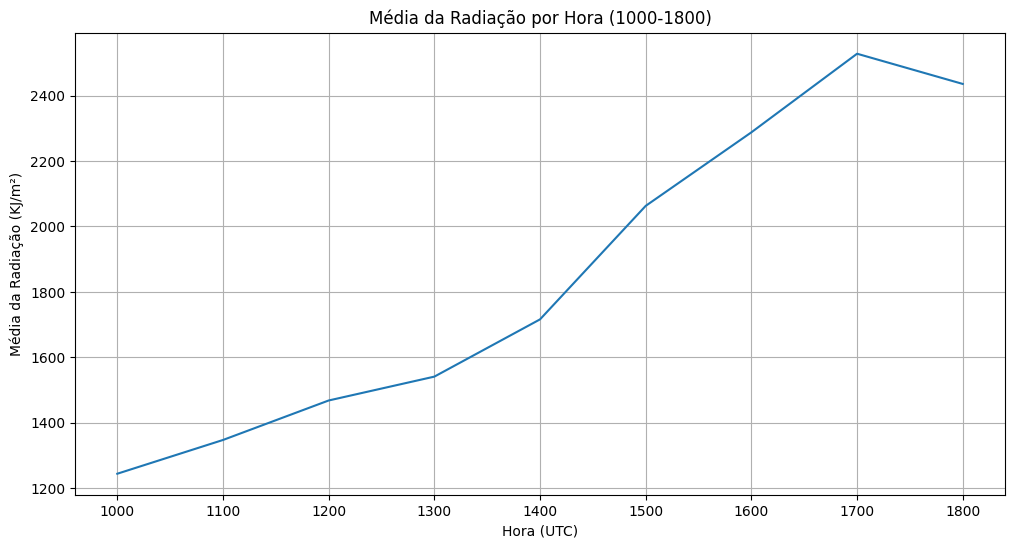

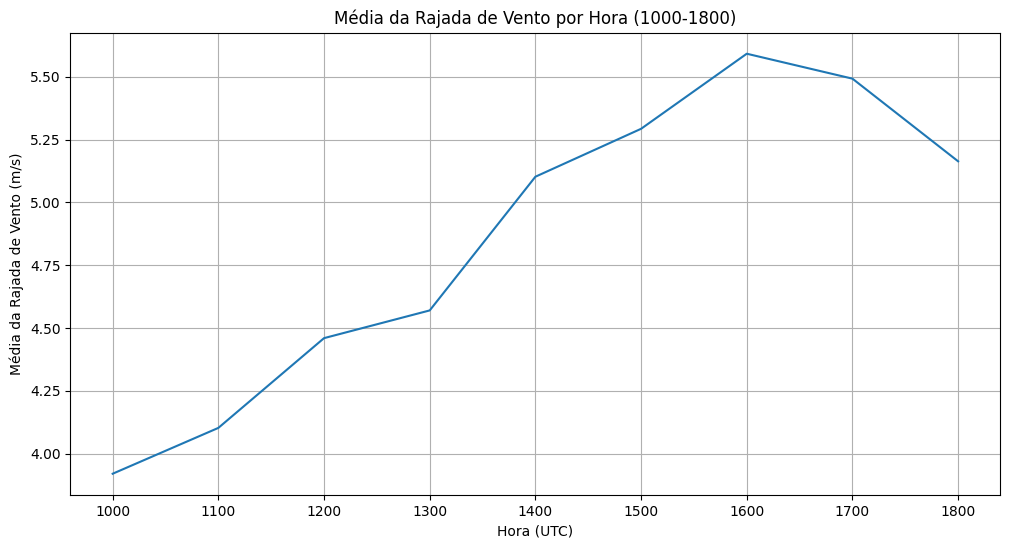

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas if not already imported

# Convert columns to string first, replace comma with dot, then convert to float
columns_to_convert_in_filtered_df = ['Raj. Vento (m/s)', 'Radiacao (KJ/m²)']
for col in columns_to_convert_in_filtered_df:
  # Convert to string first to ensure .str accessor works, then replace comma and convert to float
  filtered_df[col] = filtered_df[col].astype(str).str.replace(",", ".", regex=False)
  # Use errors='coerce' to turn invalid parsing into NaN
  filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')

# Fill any remaining missing values with the mean (optional, depending on desired behavior)
filtered_df.fillna(filtered_df.mean(numeric_only=True), inplace=True)

# Agrupa os dados filtrados por 'Hora (UTC)' e calcula a média para as colunas selecionadas
average_evolution = filtered_df.groupby('Hora (UTC)')[['Raj. Vento (m/s)', 'Radiacao (KJ/m²)']].mean()

# Resetar o índice
average_evolution_reset = average_evolution.reset_index()


# Plota a evolução média da Radiação (KJ/m²)
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_evolution, x=average_evolution.index, y='Radiacao (KJ/m²)')
plt.title('Média da Radiação por Hora (1000-1800)')
plt.xlabel('Hora (UTC)')
plt.ylabel('Média da Radiação (KJ/m²)')
plt.xticks(average_evolution.index) # Garante que todas as horas no índice sejam mostradas como ticks
plt.grid(True)
plt.show()

# Plota a evolução média da Raj. Vento (m/s)
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_evolution, x=average_evolution.index, y='Raj. Vento (m/s)')
plt.title('Média da Rajada de Vento por Hora (1000-1800)')
plt.xlabel('Hora (UTC)')
plt.ylabel('Média da Rajada de Vento (m/s)')
plt.xticks(average_evolution.index) # Garante que todas as horas no índice sejam mostradas como ticks
plt.grid(True)
plt.show()

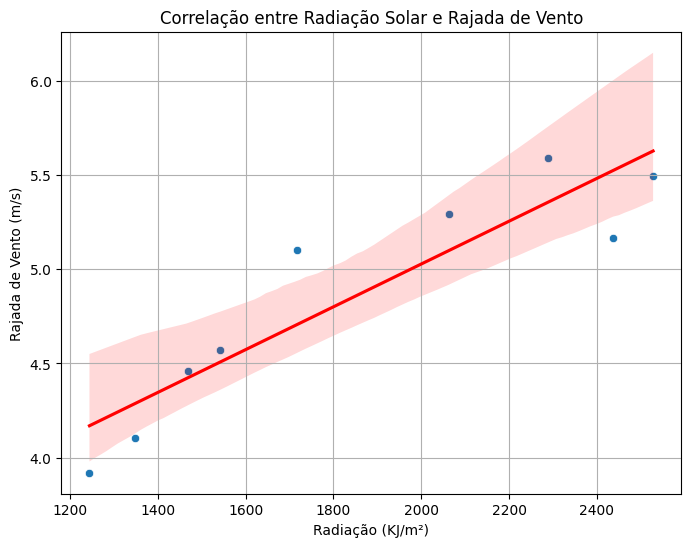

In [35]:
# Agrupar pela hora e calcular médias
average_evolution = filtered_df.groupby('Hora (UTC)')[['Raj. Vento (m/s)', 'Radiacao (KJ/m²)']].mean()

# Resetar o índice
average_evolution_reset = average_evolution.reset_index()


plt.figure(figsize=(8,6))
sns.scatterplot(data=average_evolution_reset, x='Radiacao (KJ/m²)', y='Raj. Vento (m/s)')
sns.regplot(data=average_evolution_reset, x='Radiacao (KJ/m²)', y='Raj. Vento (m/s)', scatter=False, color='red')
plt.title('Correlação entre Radiação Solar e Rajada de Vento')
plt.xlabel('Radiação (KJ/m²)')
plt.ylabel('Rajada de Vento (m/s)')
plt.grid(True)
plt.show()
